In [1]:
from urllib2 import urlopen
from json import load 
import pandas as pd
import datetime
#buliding URL:
#article for which page views need to be extracted
#look_up="Donald_Trump"
look_up=[ "Donald_Trump","Bernie_Sanders", "Hillary_Clinton","Ted_Cruz","John_Kasich"]


In [2]:

#dates between which page views need to be extracted in the format YYYYMMDD
startdate="20130101"
enddate="20160430"
i=0
for name in look_up:
#request URL : https://wikimedia.org/api/rest_v1/?doc
    url='https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/'+name+'/daily/'+startdate+'/'+enddate

    response = urlopen(url) 

#parses the json response and creates a dictionary with key "list" and value of a  list of dictionaries where each dictionary is a day's page view data
    json_obj = load(response) 

#extacting just the list of dictionaries and creating a data frame
    if i==0:
        data=pd.DataFrame(json_obj['items'])
    else:
        data=pd.concat([data,pd.DataFrame(json_obj['items'])])
    i=i+1
#data cleaning begins

#step 1 : manipulate the timestamp to create a date attribute
data["time2"]=data["timestamp"].str.rstrip('00')
data['time2']=[x + '0' if len(x)<8 else x for x in data['time2']]
data['date']=pd.to_datetime(data["time2"],format="%Y%m%d")

In [3]:
data

,access,agent,article,granularity,project,timestamp,views,time2,date
0,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070100,82159,20150701,2015-07-01
1,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070200,83458,20150702,2015-07-02
2,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070300,55615,20150703,2015-07-03
3,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070400,43865,20150704,2015-07-04
4,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070500,42220,20150705,2015-07-05
5,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070600,38412,20150706,2015-07-06
6,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070700,44158,20150707,2015-07-07
7,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070800,48631,20150708,2015-07-08
8,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070900,83969,20150709,2015-07-09
9,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015071000,59105,20150710,2015-07-10


In [4]:
data_views=pd.DataFrame(data['article'])
data_views['views']=data['views']

In [5]:
PDA_DataViews=data_views.groupby(['article']).count()

In [30]:
PDA_DataViews['mean']=data_views.groupby(['article']).mean()
PDA_DataViews['std']=data_views.groupby(['article']).std()
PDA_DataViews['median']=data_views.groupby(['article']).median()
PDA_DataViews['min']=data_views.groupby(['article']).min()
PDA_DataViews['max']=data_views.groupby(['article']).max()
PDA_DataViews.reset_index(level=0, inplace=False)
PDA_DataViews[['mean','std','median','min','max']]
PDA_DataViews.reset_index()

,article,views,mean,std,median,min,max
0,Bernie_Sanders,305,48601.416393,49015.837196,34756,9310,488675
1,Donald_Trump,305,154487.898361,354055.800585,75205,26675,4071156
2,Hillary_Clinton,305,21724.032787,15859.330724,15435,7135,114790
3,John_Kasich,305,13071.632787,25664.930995,4946,1239,274379
4,Ted_Cruz,305,28661.927869,42115.932353,15435,3796,597879


In [7]:
cd=list(data['article'].unique())
cd

[u'Donald_Trump',
 u'Bernie_Sanders',
 u'Hillary_Clinton',
 u'Ted_Cruz',
 u'John_Kasich']

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import datetime as dt

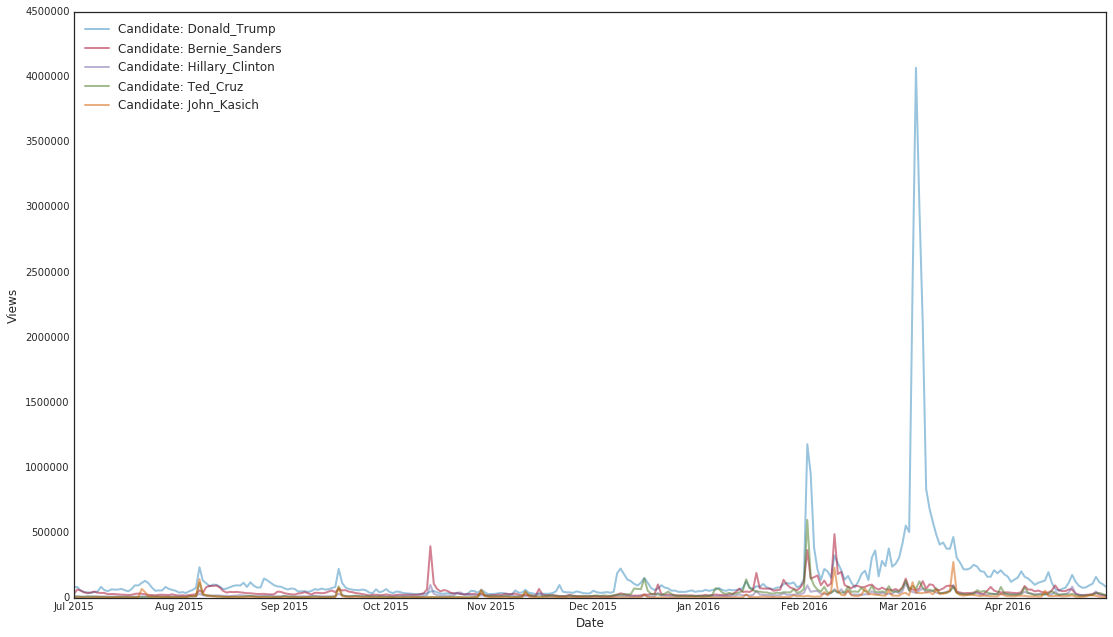

In [29]:
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
data.sort_values(by=['article', 'date'], ascending=[True, True])
for x in cd:
    dat = data[data['article']==x]
    dates =  dat['date']
    ax.plot(dates, dat['views'], label = "Candidate: {0}".format(x), alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Views")
ax.legend(loc="upper left")
plt.savefig('overview.png')



In [10]:
dt = pd.DataFrame()
for center, idx in data[data['article']=='Donald_Trump'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Donald_Trump'].ix[idx].set_index("date")['views']
    dt[center] = timediff.resample("W", how=sum)
    
bs = pd.DataFrame()
for center, idx in data[data['article']=='Bernie_Sanders'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Bernie_Sanders'].ix[idx].set_index("date")['views']
    bs[center] = timediff.resample("W", how=sum)
    
hc = pd.DataFrame()
for center, idx in data[data['article']=='Hillary_Clinton'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Hillary_Clinton'].ix[idx].set_index("date")['views']
    hc[center] = timediff.resample("W", how=sum)
    
tc = pd.DataFrame()
for center, idx in data[data['article']=='Ted_Cruz'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Ted_Cruz'].ix[idx].set_index("date")['views']
    tc[center] = timediff.resample("W", how=sum)

jk = pd.DataFrame()
for center, idx in data[data['article']=='John_Kasich'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='John_Kasich'].ix[idx].set_index("date")['views']
    jk[center] = timediff.resample("W", how=sum)


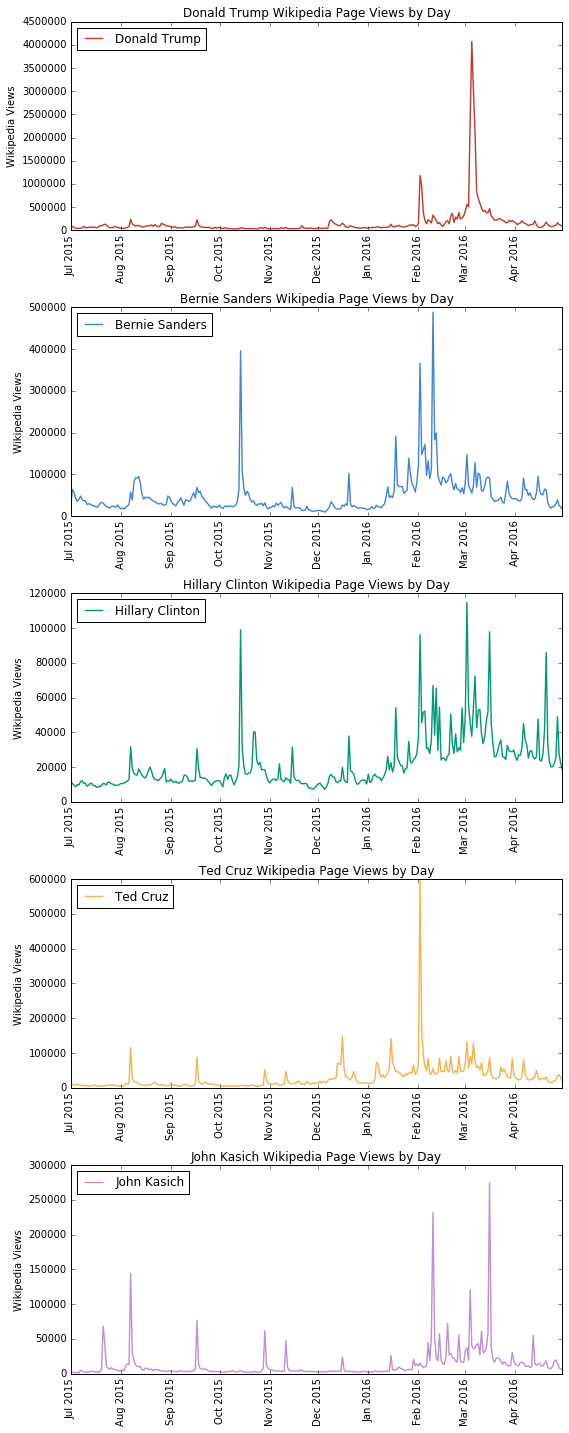

In [11]:

plt.figure(figsize=(8,20))
ax1 = plt.subplot(511)
ax1.plot(data[data['article']=='Donald_Trump']['date'], data[data['article']=='Donald_Trump']['views'], label = "Donald Trump",color="#C0392B", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Donald Trump Wikipedia Page Views by Day')

ax2 = plt.subplot(512)
ax2.plot(data[data['article']=='Bernie_Sanders']['date'], data[data['article']=='Bernie_Sanders']['views'], label = "Bernie Sanders", color="#4183D7", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Bernie Sanders Wikipedia Page Views by Day')

ax3 = plt.subplot(513)
ax3.plot(data[data['article']=='Hillary_Clinton']['date'], data[data['article']=='Hillary_Clinton']['views'], label = "Hillary Clinton", color="#019875", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Hillary Clinton Wikipedia Page Views by Day')

ax4 = plt.subplot(514)
ax4.plot(data[data['article']=='Ted_Cruz']['date'], data[data['article']=='Ted_Cruz']['views'], label = "Ted Cruz", color="#F4B350", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Ted Cruz Wikipedia Page Views by Day')

ax5 = plt.subplot(515)
ax5.plot(data[data['article']=='John_Kasich']['date'], data[data['article']=='John_Kasich']['views'], label = "John Kasich",color="#BE90D4", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('John Kasich Wikipedia Page Views by Day')
plt.tight_layout()
plt.savefig("Daily_Views.png")

In [12]:
import matplotlib

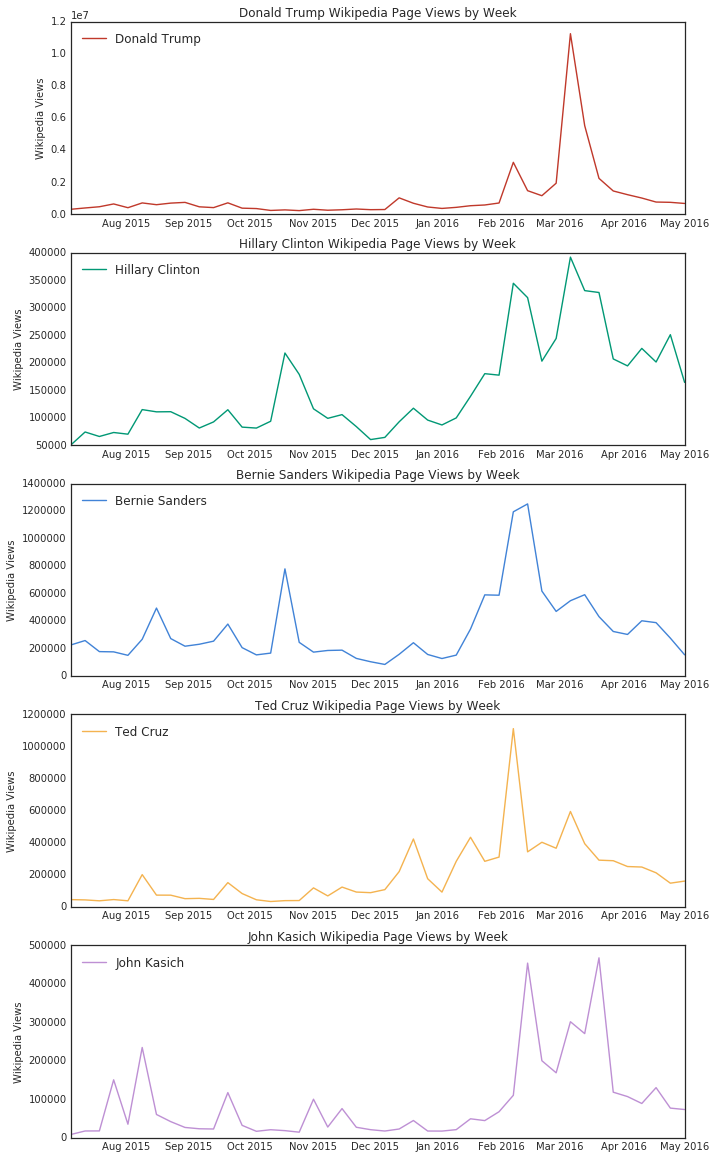

In [13]:
matplotlib.style.use('seaborn-white')
plt.figure(figsize=(11,20))
ax1 = plt.subplot(511)
ax1.plot(dt.index, dt, color="#C0392B", linewidth=1.4, label = "Donald Trump")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('Donald Trump Wikipedia Page Views by Week')

ax2 = plt.subplot(512)
ax2.plot(hc.index, hc, color="#019875", linewidth=1.4, label = "Hillary Clinton")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('Hillary Clinton Wikipedia Page Views by Week')


ax3 = plt.subplot(513)
ax3.plot(bs.index, bs, color="#4183D7", linewidth=1.4, label = "Bernie Sanders")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Bernie Sanders Wikipedia Page Views by Week')

ax4 = plt.subplot(514)
ax4.plot(tc.index, tc, color="#F4B350", linewidth=1.4, label = "Ted Cruz")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Ted Cruz Wikipedia Page Views by Week')

ax4 = plt.subplot(515)
ax4.plot(jk.index, jk, color="#BE90D4", linewidth=1.4, label = "John Kasich")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('John Kasich Wikipedia Page Views by Week')

plt.savefig('Page_views.png')

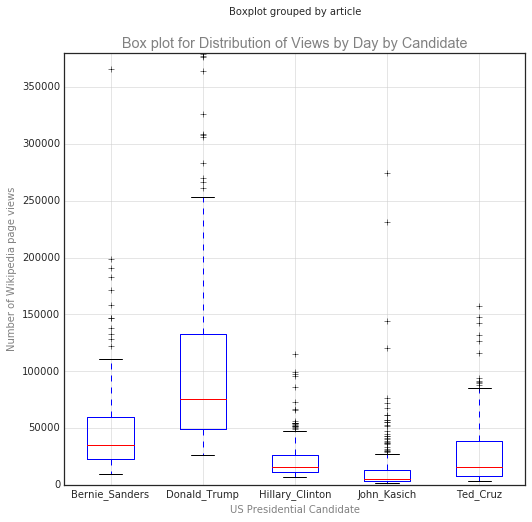

In [27]:

plt.figure(figsize=(10,10))
matplotlib.style.use('seaborn-white')
data.boxplot(by='article', figsize=(8, 8), meanline = True)
plt.ylim(0,380000)
plt.title("Box plot for Distribution of Views by Day by Candidate", color='grey')
plt.ylabel("Number of Wikipedia page views", rotation=90, color='grey', size=10)
plt.xlabel("US Presidential Candidate", color='grey', size=10)
plt.savefig('boxplot.png')